In [2]:
!pip install boto3

In [3]:
import boto3
from botocore import UNSIGNED
from botocore.client import Config
import pandas as pd
# 1) Build the anonymous S3 client to connect to S3 BUCKET
anon_s3 = boto3.client(
    's3',
    region_name='eu-north-1',
    config=Config(signature_version=UNSIGNED)
)
# VIEW CONTENTS OF BUCKET

resp = anon_s3.list_objects_v2(Bucket='eda-python')
for obj in resp.get('Contents', []):
    print(obj['Key'])

Cuisine_rating.csv
fifa_eda.csv


In [10]:
# 2) Fetch the object
obj = anon_s3.get_object(Bucket='eda-python', Key='fifa_eda.csv')

# 3) Read it into a DataFrame directly from the response stream
fifa_eda = pd.read_csv(obj['Body'])
fifa_eda.sample(5)


,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
6790,207916,L. Vigen Christensen,23,Denmark,68,74,Brøndby IF,1200.0,9.0,Right,1.0,3.0,RCM,2017,2021-01-01,5.916667,176.0,1800.0
215,177610,Javi Martínez,29,Spain,83,83,FC Bayern München,20000.0,94.0,Right,3.0,2.0,CDM,2012,2021-01-01,6.333333,190.0,33000.0
17507,239084,K. Ackermann,17,Sweden,54,75,BK Häcken,150.0,1.0,Right,1.0,2.0,CM,2017,2021-01-01,5.833333,183.0,338.0
4264,188765,M. Mostefa,34,Algeria,71,71,AS Béziers,725.0,4.0,Right,1.0,2.0,RDM,2018,2021-01-01,5.916667,181.0,1300.0
9890,200954,D. Thomalla,25,Germany,66,69,1. FC Heidenheim 1846,825.0,4.0,Right,1.0,3.0,ST,2016,2020-01-01,6.083333,165.0,1300.0


In [11]:
fifa_eda.describe()

,ID,Age,Overall,Potential,Value,Wage,International Reputation,Skill Moves,Joined,Height,Weight,Release Clause
count,18207.000000,18207.000000,18207.000000,18207.000000,17955.000000,18207.000000,18159.000000,18159.000000,18207.000000,18207.000000,18207.000000,18207.000000
mean,214298.338606,25.122206,66.238699,71.307299,2444.530214,9.731312,1.113222,2.361308,2016.420607,5.946771,165.979129,4585.060971
std,29965.244204,4.669943,6.908930,6.136496,5626.715434,21.999290,0.394031,0.756164,2.018194,0.220514,15.572775,10630.414430
min,16.000000,16.000000,46.000000,48.000000,10.000000,0.000000,1.000000,1.000000,1991.000000,5.083333,110.000000,13.000000
25%,200315.500000,21.000000,62.000000,67.000000,325.000000,1.000000,1.000000,2.000000,2016.000000,5.750000,154.000000,570.000000
50%,221759.000000,25.000000,66.000000,71.000000,700.000000,3.000000,1.000000,2.000000,2017.000000,5.916667,165.000000,1300.000000
75%,236529.500000,28.000000,71.000000,75.000000,2100.000000,9.000000,1.000000,3.000000,2018.000000,6.083333,176.000000,4585.060806
max,246620.000000,45.000000,94.000000,95.000000,118500.000000,565.000000,5.000000,5.000000,2018.000000,6.750000,243.000000,228100.000000


In [12]:
fifa_eda.columns


Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value', 'Wage', 'Preferred Foot', 'International Reputation',
       'Skill Moves', 'Position', 'Joined', 'Contract Valid Until', 'Height',
       'Weight', 'Release Clause'],
      dtype='object')

In [13]:
fifa_eda.isnull().sum()

ID                            0
Name                          0
Age                           0
Nationality                   0
Overall                       0
Potential                     0
Club                        241
Value                       252
Wage                          0
Preferred Foot                0
International Reputation     48
Skill Moves                  48
Position                      0
Joined                        0
Contract Valid Until        289
Height                        0
Weight                        0
Release Clause                0
dtype: int64

In [15]:
fifa_eda.duplicated().sum()

np.int64(0)

In [16]:
fifa_eda['Years_Joined'] = 2025 - data_cuisine['Joined']
fifa_eda.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause,Years_Joined
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5.0,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.0,21
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,Right,5.0,5.0,ST,2018,2022-01-01,6.166667,183.0,127100.0,7
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290.0,Right,5.0,5.0,LW,2017,2022-01-01,5.750000,150.0,228100.0,8
3,193080,De Gea,27,Spain,91,93,Manchester United,72000.0,260.0,Right,4.0,1.0,GK,2011,2020-01-01,6.333333,168.0,138600.0,14
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355.0,Right,4.0,4.0,RCM,2015,2023-01-01,5.916667,154.0,196400.0,10


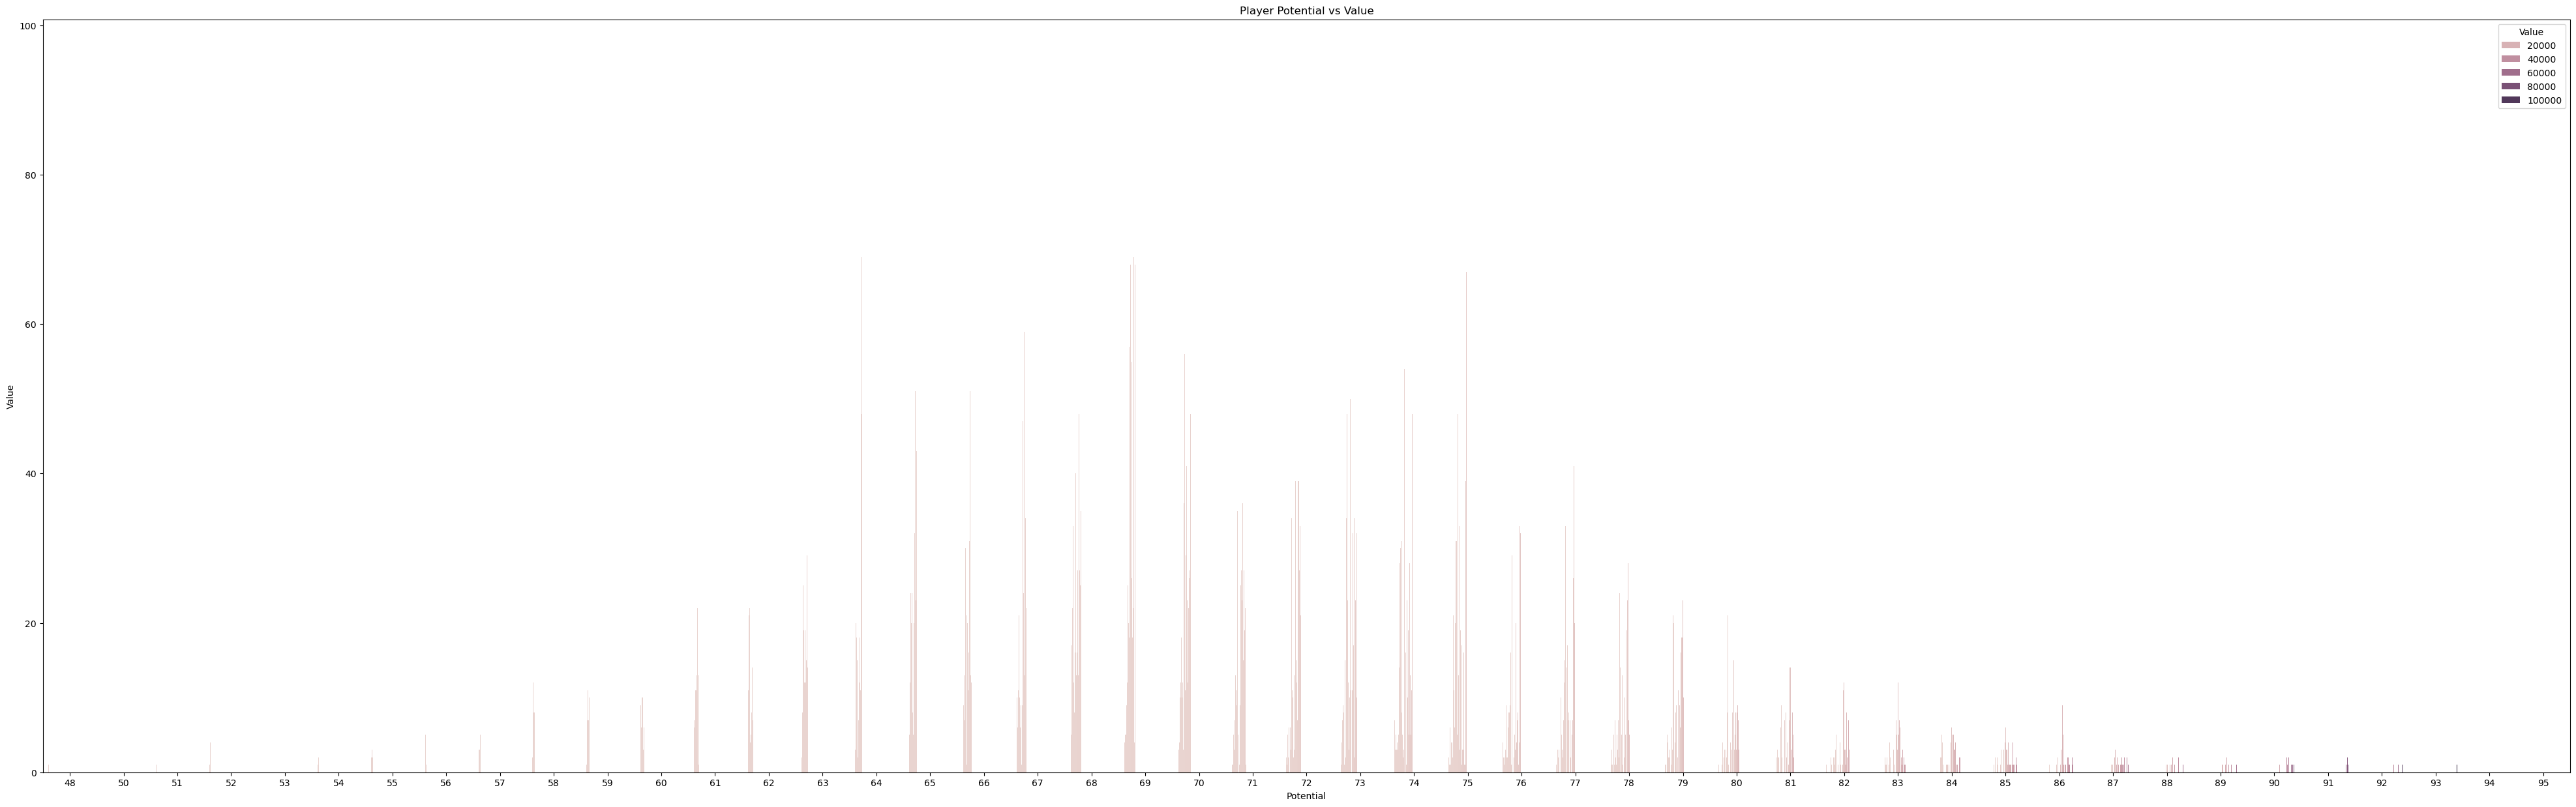

In [27]:

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(50, 15))
sns.countplot(x='Potential', hue='Value', data=fifa_eda)
plt.title('Player Potential vs Value')
plt.xlabel('Potential')
plt.ylabel('Value')
plt.show()


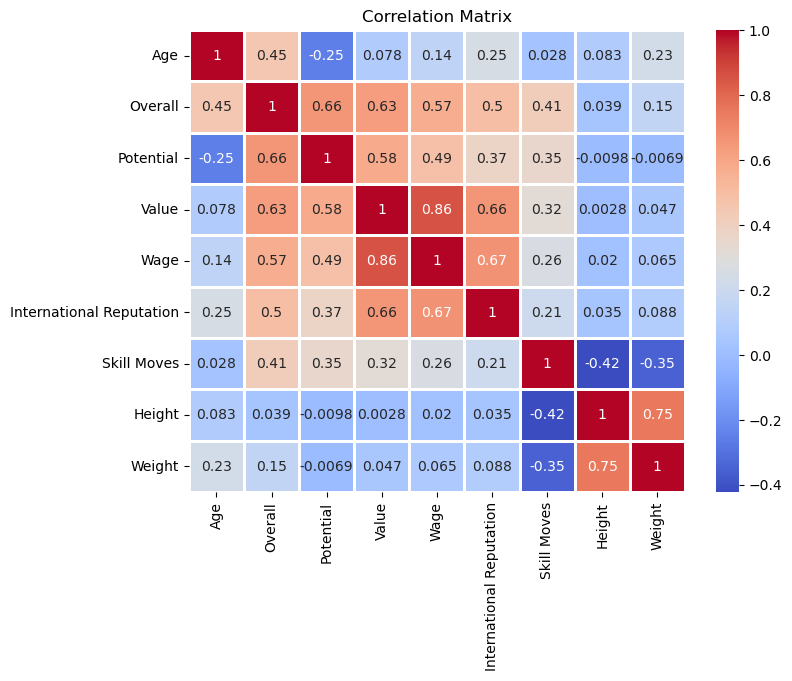

In [28]:
plt.figure(figsize=(8, 6))
correlation_matrix = fifa_eda[['Age', 'Overall', 'Potential', 'Value', 'Wage', 'International Reputation','Skill Moves', 'Height', 'Weight' ]].corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',linewidth=1)
plt.title('Correlation Matrix')
plt.show()

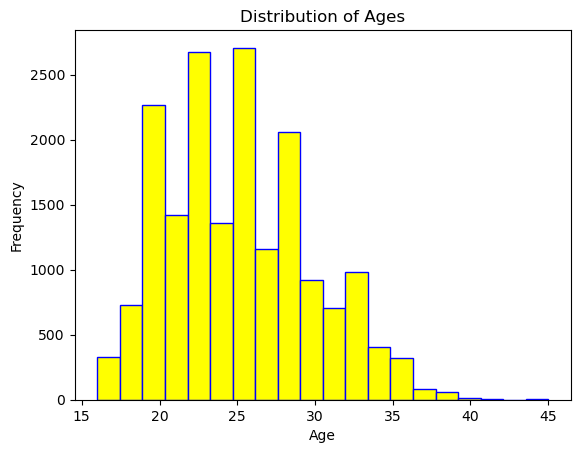

In [12]:
import boto3
from botocore import UNSIGNED
from botocore.client import Config
import pandas as pd

anon_s3 = boto3.client(
    's3',
    region_name='eu-north-1',
    config=Config(signature_version=UNSIGNED)
)

import matplotlib.pyplot as plt
import pandas as pd

obj = anon_s3.get_object(Bucket='eda-python', Key='fifa_eda.csv')


fifa_eda = pd.read_csv(obj['Body'])
fifa_eda.sample(5)

plt.hist(fifa_eda['Age'], color="yellow", bins=20, edgecolor='blue')
plt.title("Distribution of Ages")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


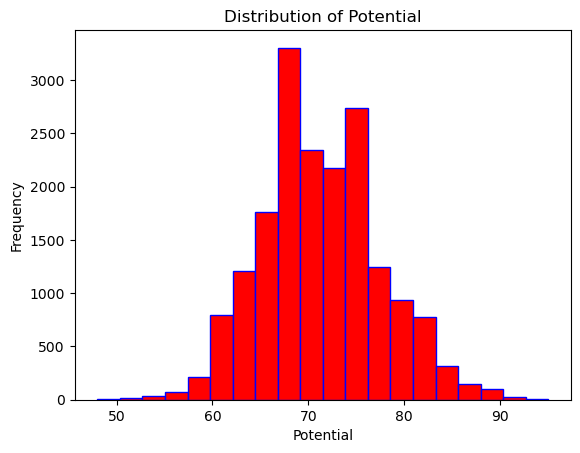

In [11]:
import boto3
from botocore import UNSIGNED
from botocore.client import Config
import pandas as pd

anon_s3 = boto3.client(
    's3',
    region_name='eu-north-1',
    config=Config(signature_version=UNSIGNED)
)

import matplotlib.pyplot as plt
import pandas as pd

obj = anon_s3.get_object(Bucket='eda-python', Key='fifa_eda.csv')


fifa_eda = pd.read_csv(obj['Body'])
fifa_eda.sample(5)

plt.hist(fifa_eda['Potential'], color="red", bins=20, edgecolor='blue')
plt.title("Distribution of Potential")
plt.xlabel("Potential")
plt.ylabel("Frequency")
plt.show()


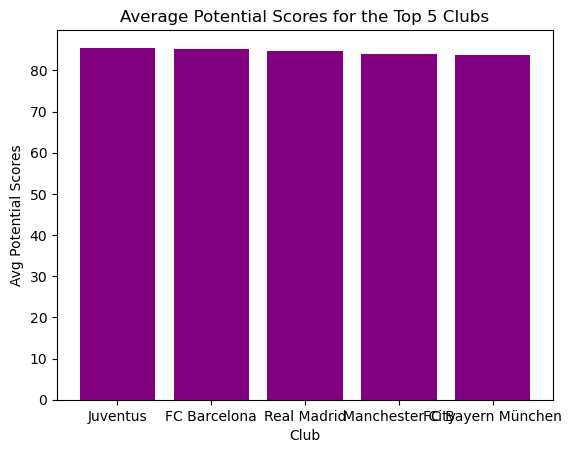

In [17]:

avg_ms = fifa_eda.groupby("Club")["Potential"].mean().sort_values(ascending=False).head(5).reset_index()

plt.bar(x=avg_ms['Club'], height=avg_ms['Potential'], color="purple")

plt.title("Average Potential Scores for the Top 5 Clubs")
plt.xlabel("Club")
plt.ylabel("Avg Potential Scores")
plt.show()